In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [3]:
url = "https://drive.google.com/uc?id=1J5yqeokVKRrBZXrNxxnwXN_jGG4pUybL"
data = pd.read_csv(url)

In [7]:
data.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [13]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [9]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


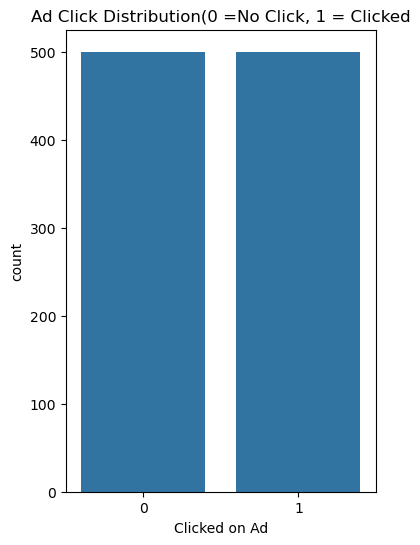

In [19]:
plt.figure(figsize=(4,6))
sns.countplot(x='Clicked on Ad',data=data)
plt.title("Ad Click Distribution(0 =No Click, 1 = Clicked")
plt.show()

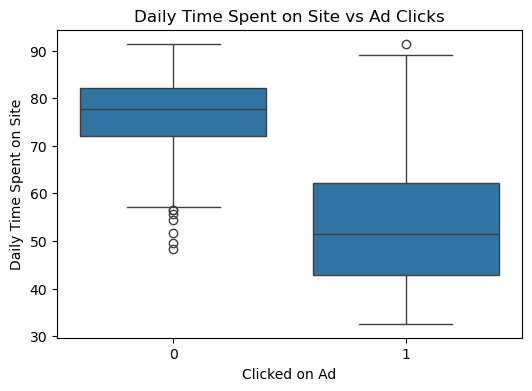

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=data)
plt.title("Daily Time Spent on Site vs Ad Clicks")
plt.show()

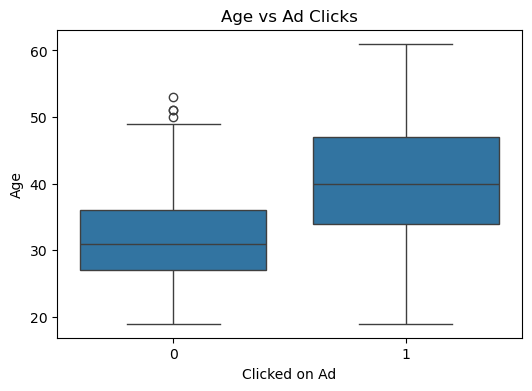

In [23]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Clicked on Ad', y='Age', data=data)
plt.title("Age vs Ad Clicks")
plt.show()

In [48]:
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']
X = data[features]
y = data['Clicked on Ad']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [58]:
print("\n🔹 Model Evaluation Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("Precision:", round(precision_score(y_test, y_pred), 3))
print("Recall:", round(recall_score(y_test, y_pred), 3))
print("F1 Score:", round(f1_score(y_test, y_pred), 3))
print('Confusion Matrix:',confusion_matrix(y_test,y_pred))



🔹 Model Evaluation Metrics:
Accuracy: 0.97
Precision: 0.98
Recall: 0.961
F1 Score: 0.97
Confusion Matrix: [[143   3]
 [  6 148]]


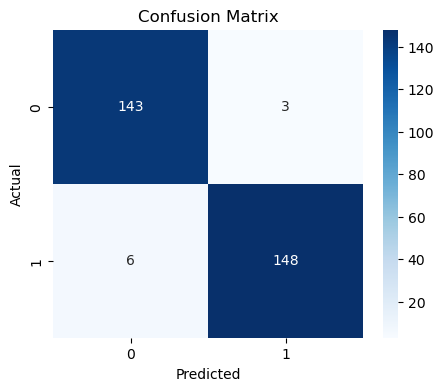

In [60]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
print("\n🔹 Classification Report:")
print(classification_report(y_test, y_pred))


🔹 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [64]:
new_user = pd.DataFrame({
    'Daily Time Spent on Site': [70],
    'Age': [32],
    'Area Income': [55000],
    'Daily Internet Usage': [200],
    'Male': [1]
})

In [66]:
new_user_scaled = scaler.transform(new_user)
click_probability = model.predict_proba(new_user_scaled)[0][1]
print(f"\n🔹 Predicted Probability of Click: {click_probability:.2f}")


🔹 Predicted Probability of Click: 0.18
